In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pyvis
from pyvis.network import Network
import inspect
import pandas as pd

print('RDKit version: ',rdBase.rdkitVersion)
print('MatplotLib version:', mpl.__version__)
print('Pyvis version:', pyvis.__version__)


RDKit version:  2020.03.2
MatplotLib version: 3.3.1
Pyvis version: 0.1.8.2


#### svg drawing function

In [2]:
def moltosvg(mol,molSize=(450,250),kekulize=True):
    mc=rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    opts = drawer.drawOptions()
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [3]:
data= pd.read_csv('smiles_list_172.txt')

In [4]:
smiles_list=data['smiles']
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

## Define input molecules

In [5]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')

## Define scaffold network parameters

In [6]:
params = rdScaffoldNetwork.ScaffoldNetworkParams()

## try out BRICS bond breaking rules:
#params = rdScaffoldNetwork.BRICSScaffoldParams()

## try out custom bond breaking rules:
#params = rdScaffoldNetwork.ScaffoldNetworkParams(["[$([C;D3]([#0,#6,#7,#8])(=O)):1]-;!@[$([N;!D1;!$(N=*);!$(N-[!#6;!#16;!#0;!#1]);!$([N;R]@[C;R]=O)]):2]>>[1*]-[*:1].[5*]-[*:2]"])

#### print default parameter attributes

In [7]:
attributes=[a for a in inspect.getmembers(params) if not(a[0].startswith('__'))]
print('params default attributes:')
for a in attributes:
    print('{0}: {1}'.format(a[0],a[1]))


params default attributes:
flattenChirality: True
flattenIsotopes: True
flattenKeepLargest: True
includeGenericBondScaffolds: False
includeGenericScaffolds: True
includeScaffoldsWithAttachments: True
includeScaffoldsWithoutAttachments: True
keepOnlyFirstFragment: True
pruneBeforeFragmenting: True


#### customize parameter attributes

In [8]:
#params.includeGenericBondScaffolds=True

#팔다리 없는것
params.includeScaffoldsWithAttachments=False

#원자정보 없는것 
params.includeGenericScaffolds=False

#원자정보없고, 단일결합으로 치환된것 
params.includeGenericBondScaffolds=False


## Create scaffold network 

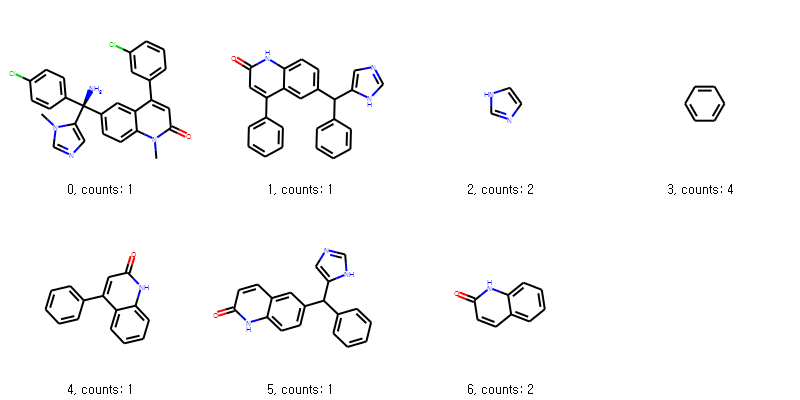

In [9]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([mol_list[0]],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


In [10]:
for i in range(171):
    rdScaffoldNetwork.UpdateScaffoldNetwork([mol_list[i+1]],net,params)

## Update network: Adding more molecules

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


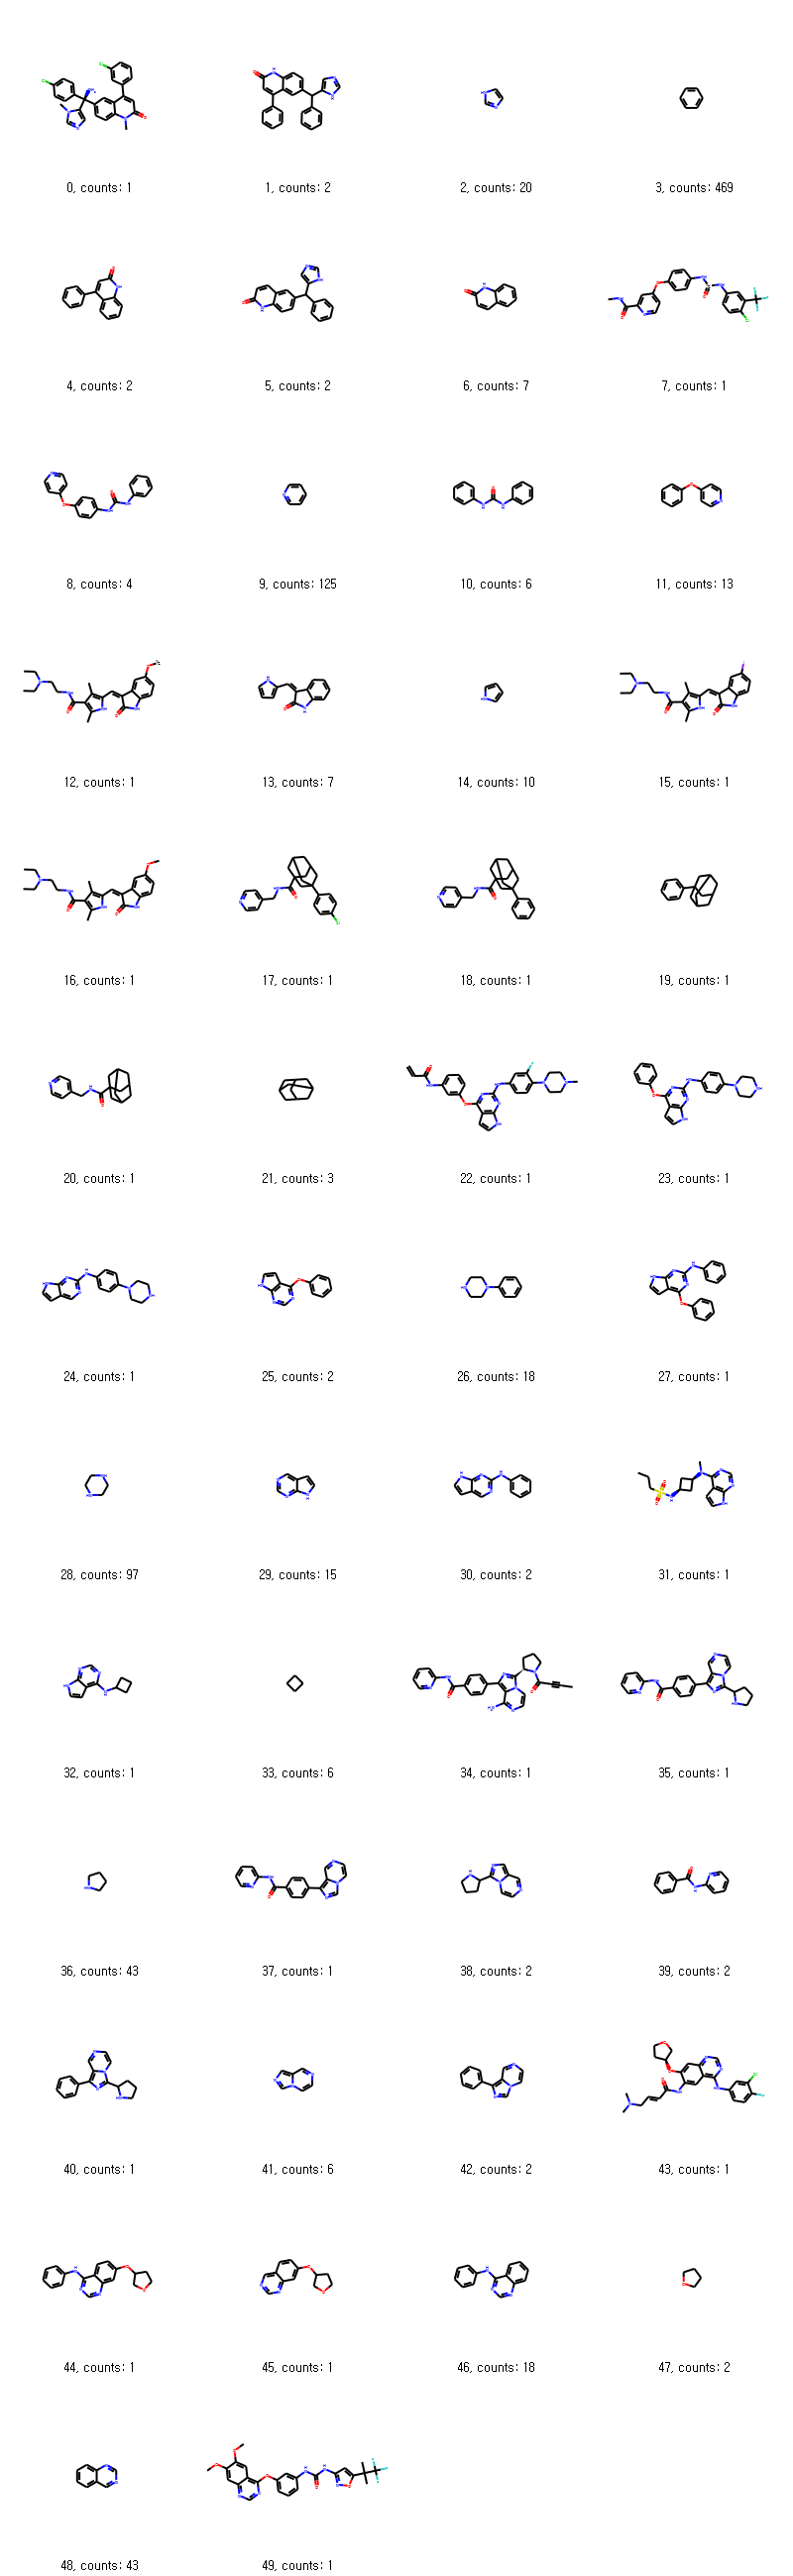

In [11]:


nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4,maxMols=50)


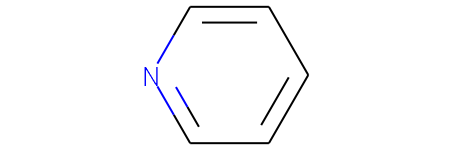

In [12]:
nodemols[9]

In [13]:
len(nodemols)

876

In [14]:
len(net.counts)

876

In [15]:
Chem.MolToSmiles(nodemols[12])

'CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\\C(=O)Nc3ccc(O[11CH3])cc32)c1C'

In [16]:
freq=[]
for i in range(len(net.counts)):
    freq.append(net.counts[i])

In [17]:
freq

[1,
 2,
 20,
 469,
 2,
 2,
 7,
 1,
 4,
 125,
 6,
 13,
 1,
 7,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 18,
 1,
 97,
 15,
 2,
 1,
 1,
 6,
 1,
 1,
 43,
 1,
 2,
 2,
 1,
 6,
 2,
 1,
 1,
 1,
 18,
 2,
 43,
 1,
 1,
 4,
 1,
 7,
 1,
 1,
 2,
 1,
 1,
 27,
 68,
 1,
 1,
 2,
 4,
 14,
 100,
 1,
 2,
 3,
 1,
 1,
 3,
 3,
 10,
 2,
 30,
 1,
 45,
 5,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 38,
 1,
 1,
 1,
 1,
 1,
 59,
 2,
 2,
 4,
 1,
 1,
 1,
 3,
 2,
 2,
 3,
 1,
 7,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 19,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 36,
 20,
 6,
 1,
 3,
 12,
 5,
 4,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 1,
 2,
 12,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 7,
 13,
 1,
 6,
 14,
 1,
 9,
 2,
 1,
 1,
 1,
 2,
 7,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 3,
 1,
 2,
 1,
 4,
 1,
 1,
 12,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 13,
 2,
 1,
 1,
 1,
 1,
 1,


In [18]:
tmp=pd.DataFrame(freq)

In [19]:
tmp.rename(columns={0:'freq'}, inplace = True)

In [20]:
tmp

,freq
0,1
1,2
2,20
3,469
4,2
...,...
871,1
872,2
873,1
874,3


In [21]:
#tmp.to_excel('_general_scaffold172_scaffold_net_result_20200902.xlsx')

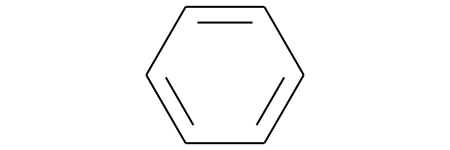

In [22]:
nodemols[3]